In [1]:
#Import lib
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from pandas.plotting import scatter_matrix

In [194]:
dataset = pd.read_csv("winequalityN.csv")
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [195]:
dataset = dataset.dropna()

In [196]:
dataset = dataset.reset_index()

In [197]:
dataset.isnull().sum()

index                   0
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [198]:
dataset["quality"].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

In [199]:
dataset['label_quality'] = 0

In [200]:
for i in range(len(dataset)):
    if dataset['quality'][i] >= 7:
        dataset['label_quality'][i] = 1
    else:
        dataset['label_quality'][i] = 0

for i in range(len(dataset)):
    if dataset['type'][i] == "white":
        dataset['type'][i] = 1
    else:
        dataset['type'][i] = 0


<ipython-input-200-3d775171e6d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['label_quality'][i] = 0
<ipython-input-200-3d775171e6d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['label_quality'][i] = 1
<ipython-input-200-3d775171e6d3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['type'][i] = 1
<ipython-input-200-3d775171e6d3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [201]:
dataset

,index,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label_quality
0,0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
6459,6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6460,6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6461,6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


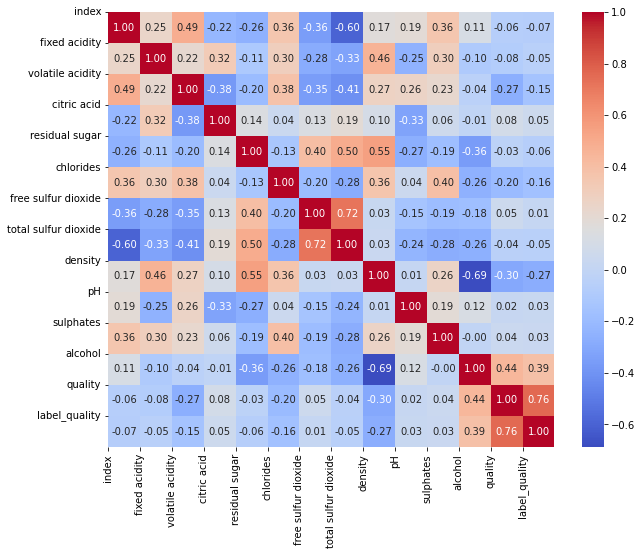

In [202]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [203]:
dataset["label_quality"].value_counts()

0    5192
1    1271
Name: label_quality, dtype: int64

In [204]:
corr["label_quality"][:].sort_values(ascending=True)

density                -0.274404
chlorides              -0.161593
volatile acidity       -0.151756
index                  -0.068638
residual sugar         -0.062492
total sulfur dioxide   -0.051459
fixed acidity          -0.049347
free sulfur dioxide     0.014821
pH                      0.027553
sulphates               0.034767
citric acid             0.053870
alcohol                 0.390937
quality                 0.759495
label_quality           1.000000
Name: label_quality, dtype: float64

In [205]:
dataset = dataset.drop('quality', axis = 1)
dataset

,index,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label_quality
0,0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
6459,6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6460,6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6461,6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [206]:
X = dataset.drop('label_quality', axis = 1).values
y = dataset['label_quality'].values.reshape(-1,1)

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [208]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (5170, 13)
Shape of X_test:  (1293, 13)
Shape of y_train:  (5170, 1)
Shape of y_test (1293, 1)


In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training set: ", accuracy_train)

y_pred_test = clf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_test)
print("Test set: ", accuracy_rf_test)



<ipython-input-216-6eea98c099c6>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Training set:  0.8065764023210832
Test set:  0.7904098994586234


In [211]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training set: ", accuracy_train)

y_pred_test = clf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_test)
print("Test set: ", accuracy_rf_test)

E:\anaconda\envs\Ynov elective\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training set:  0.8980657640232108
Test set:  0.7788089713843774


In [218]:
import xgboost as xgb
clf = xgb.XGBClassifier(seed = 82)

clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training set: ", accuracy_train)

y_pred_test = clf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_test)
print("Test set: ", accuracy_rf_test)


E:\anaconda\envs\Ynov elective\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\anaconda\envs\Ynov elective\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:10:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set:  0.9984526112185687
Test set:  0.8863109048723898


In [225]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)


clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training set: ", accuracy_train)

y_pred_test = clf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_test)
print("Test set: ", accuracy_rf_test)


Training set:  1.0
Test set:  0.8259860788863109


ModuleNotFoundError: No module named 'xgboost'